<a href="https://colab.research.google.com/github/johsieders/artificial-intelligence/blob/master/exploring/autograd.ipynb"
target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch's Autograd Explained
This lesson introduces PyTorch's autograd library. The feature autograd relies basically on the chain rule.

## Gradients along Different Paths are Added


Let us look a a simple example.

![an example](autograd.jpg)

So, the row vector $b$ is added to each row of $X\cdot W^{T}$. Note that weight $W$ and bias $b$ keep
their dimensions forever, whereas $X$ features an arbitrary number $n$ of rows. The rationale is as follows:
$p$ is the number of features observed, $n$ the number of measurements, and $Y$ the expected outcome
to be compared to some target $T$.

This is what it looks like in PyTorch:

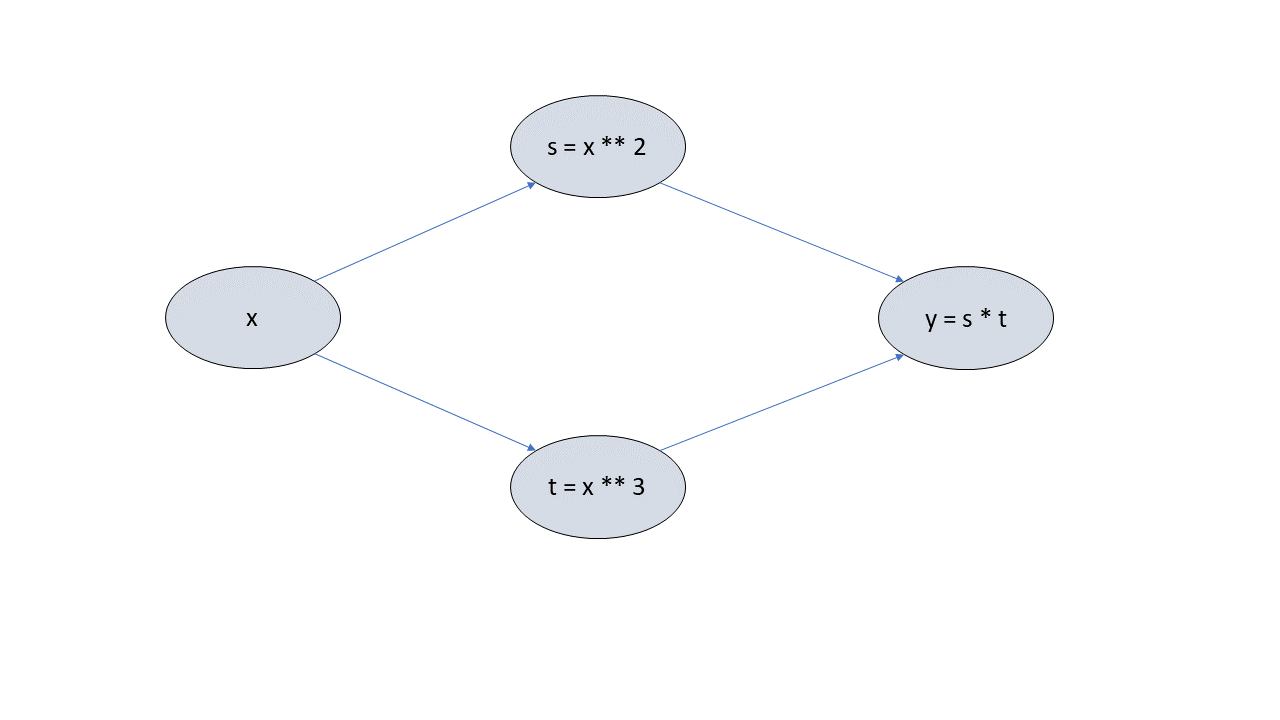

In [7]:
from IPython.display import display, Image, SVG, Math, YouTubeVideo

i = Image(url='http://jupyter.org/assets/nav_logo.svg')

j = Image(url='https://www.python.org/static/img/python-logo-large.png')

h = Image(filename='autograd.png')

display(i)
display(j)
display(h)





In [3]:
import torch

def testScalar():
        """
        scalar --> scalar --> scalar
        This shows:
        * gradients along different paths are added
        * each forward step allows one backward step.

        """
        x = torch.tensor(1., requires_grad=True)

        s = x ** 2
        t = x ** 3
        y = s * t  # x ** 5 == 1

        y.backward()
        if x.grad != 5:  # 5 = 5 * x ** 4
            raise Exception

        with torch.no_grad():
            x += 1
            x.grad.zero_()   # is mandatory

        s = x ** 2
        t = x ** 3
        y = s * t  # x ** 5

        y.backward()
        if x.grad != 80:  # 80 = 5 * x ** 4
            raise Exception

        print('run successfully')

testScalar()

run successfully


## The Linear Layer



The `Linear` constructor takes two parameters: `p`, the number of input features and `q`, the number of output features. At construction, weight and bias are randomly initialized. These parameters can be accessed by `state_dict()`, set to any values and reloaded by means of `load_state_dict()`.



In [2]:
import torch
import torch.nn as nn

def exploreApply():

  n = 4     # number of measurements
  p = 2     # number of input features
  q = 3     # number of output features

  l_shape = [p, q]
  x_shape = [n, p]

  # lin is a function object as described above
  lin = nn.Linear(*l_shape)     # weight : p x q, bias : q

  # getting weight and bias from the state dictionary
  dict = lin.state_dict()
  w = dict['weight']
  b = dict['bias']

  x = torch.tensor([11., 12., 21., 22., 31., 32., 41., 42.])  # features
  x = x.view(x_shape) 

  # applying lin = Linear(2, 3) and checking the result
  y = lin(x)

  # this is what lin does
  z = x.mm(w.t()) + b  # (n x p) * (p x q)  + (n x q)

  if not torch.equal(y, z):
    raise Exception

  print('run successfully')

exploreApply()

run successfully


In [3]:
  # lin is a function object as described above
      lin = nn.Linear(2, 3)     # weight : 3 x 2, bias : 3

      # x is an input vector with two features (per row) four times measured
      x = torch.tensor([5., 6., 30., 40., 200., 600., 0., 0],
                      requires_grad=True).reshape(x_shape)  # x : 4 x 2

      # setting weight and bias to arbitrary values
      w = torch.full(w_shape, 2.)
      b = torch.full(b_shape, 7.)
      xd = {'weight': w, 'bias': b}
      lin.load_state_dict(xd)

      # applying lin = Linear(2, 3) and checking the result
      y = lin(x)
      z = x.mm(w.t()) + b  # (3 x 2) * (2 x 1)  + (3 x 1)
      if  not torch.equal(y, z):
        raise Exception

      # sum is an arbitrary scalar-valued function
      s = y.sum()

      # computing the gradients for weight and bias with respect to s
      s.backward()

      # one step of gradient descent applied to weight and bias
      for p in lin.parameters():
          p.data -= p.grad.data

      # getting weight and bias from the state dictionary
      xd = lin.state_dict()
      w = xd['weight']
      b = xd['bias']

      # applying lin = Linear(2, 3) with modified parameters and checking the result
      y = lin(x)
      z = x.mm(w.t()) + b
      if  not torch.equal(y, z):
          raise Exception
      
      print('run successfully')

testLinear()

IndentationError: unexpected indent (<ipython-input-3-d351889f1637>, line 2)

  # lin is a function object as described above
      lin = nn.Linear(2, 3)     # weight : 3 x 2, bias : 3

      # x is an input vector with two features (per row) four times measured
      x = torch.tensor([5., 6., 30., 40., 200., 600., 0., 0],
                      requires_grad=True).reshape(x_shape)  # x : 4 x 2

      # setting weight and bias to arbitrary values
      w = torch.full(w_shape, 2.)
      b = torch.full(b_shape, 7.)
      xd = {'weight': w, 'bias': b}
      lin.load_state_dict(xd)

      # applying lin = Linear(2, 3) and checking the result
      y = lin(x)
      z = x.mm(w.t()) + b  # (3 x 2) * (2 x 1)  + (3 x 1)
      if  not torch.equal(y, z):
        raise Exception

      # sum is an arbitrary scalar-valued function
      s = y.sum()

      # computing the gradients for weight and bias with respect to s
      s.backward()

      # one step of gradient descent applied to weight and bias
      for p in lin.parameters():
          p.data -= p.grad.data

      # getting weight and bias from the state dictionary
      xd = lin.state_dict()
      w = xd['weight']
      b = xd['bias']

      # applying lin = Linear(2, 3) with modified parameters and checking the result
      y = lin(x)
      z = x.mm(w.t()) + b
      if  not torch.equal(y, z):
          raise Exception
      
      print('run successfully')

testLinear()

## Linear Mappings

A linear mapping is given by a $(q \times p)$-matrix $W$ ($W$ for weight) and a $(1 \times q)$-vector $b$ ($b$ for bias). It maps an $(n \times p)$-matrice $X$ to an $(n \times p)$-matrice $Y$. The number $n$ of rows can be any integer greater zero. The mapping is defined as

> $ Y = X \cdot W^{T} + B $

> $ (n \times q) \cong (n \times p) \cdot (p \times q) + (n \times q)$

with $B$ consisting of $n$ identical rows:

>$B = \left[ \begin{array}{rrrr}
b  \\
\vdots\\
b  \\
\end{array}\right] $

So, the row vector $b$ is added to each row of $X\cdot W^{T}$. Note that weight $W$ and bias $b$ keep their dimensions forever, whereas $X$ features an arbitrary number $n$ of rows. The rationale is as follows: $p$ is the number of features observed, $n$ the number of measurements, and $Y$ the expected outcome to be compared to some target $T$.  

This is what it looks like in PyTorch:

## Linear Mappings

A linear mapping is given by a $(q \times p)$-matrix $W$ ($W$ for weight) and a $(1 \times q)$-vector $b$ ($b$ for bias). It maps an $(n \times p)$-matrice $X$ to an $(n \times p)$-matrice $Y$. The number $n$ of rows can be any integer greater zero. The mapping is defined as

> $ Y = X \cdot W^{T} + B $

> $ (n \times q) \cong (n \times p) \cdot (p \times q) + (n \times q)$

with $B$ consisting of $n$ identical rows:

>$B = \left[ \begin{array}{rrrr}
b  \\
\vdots\\
b  \\
\end{array}\right] $

So, the row vector $b$ is added to each row of $X\cdot W^{T}$. Note that weight $W$ and bias $b$ keep their dimensions forever, whereas $X$ features an arbitrary number $n$ of rows. The rationale is as follows: $p$ is the number of features observed, $n$ the number of measurements, and $Y$ the expected outcome to be compared to some target $T$.  

This is what it looks like in PyTorch:

In [ ]:
import torch

def exploreBasics():
 
  n = 4     # number of measurements
  p = 2     # number of input features
  q = 3     # number of output features

  b_shape = [q]
  w_shape = [q, p]
  x_shape = [n, p]

  b = torch.tensor([3., 3., 3.])  # bias
  b = b.view(b_shape)

  w = torch.tensor([1., 1., 1., 1., 1., 1.])  # weight
  w = w.view(w_shape) 

  x = torch.tensor([11., 12., 21., 22., 31., 32., 41., 42.])  # features
  x = x.view(x_shape) 

  # mm stands for matrix multiplication
  # b is automatically added to all rows 

  y = x.mm(w.t()) + b
  print(y)

exploreBasics()

## The Linear Layer

PyTorch features numerous layers each of which wraps a particular functions. So, `Identity` wraps the identity function, `Linear` wraps linear mappings, `Conv1d` wraps one dimensional convolutions and so on. What do these wrappings do? Let us look at `Linear`, an easy one.

Each object `lin` of `Linear` is a function object which applies a linear mapping defined by weight and bias to the argument x. Weight and bias are stored in the static dictionary of `lin`, accessible by name (`weight`and `bias`). The use of Linear and any other layer is at least twofold:
* In the course of an optimization (e.g. steepest gradient descent), the function object is repeatedly called, with weight and bias being adjusted at each step .
* Linear and all other layers play a crucial role in the backpropagation algorithm. This is part of tutorial on its own << todo >> 

The `Linear` constructor takes two parameters: `p`, the number of input features and `q`, the number of output features. At construction, weight and bias are randomly initialized. These parameters can be accessed by `state_dict()`, set to any values and reloaded by means of `load_state_dict()`.



In [ ]:
import torch
import torch.nn as nn

def exploreApply():

  n = 4     # number of measurements
  p = 2     # number of input features
  q = 3     # number of output features

  l_shape = [p, q]
  x_shape = [n, p]

  # lin is a function object as described above
  lin = nn.Linear(*l_shape)     # weight : p x q, bias : q

  # getting weight and bias from the state dictionary
  dict = lin.state_dict()
  w = dict['weight']
  b = dict['bias']

  x = torch.tensor([11., 12., 21., 22., 31., 32., 41., 42.])  # features
  x = x.view(x_shape) 

  # applying lin = Linear(2, 3) and checking the result
  y = lin(x)

  # this is what lin does
  z = x.mm(w.t()) + b  # (n x p) * (p x q)  + (n x q)

  if not torch.equal(y, z):
    raise Exception

  print('run successfully')

exploreApply()

In [ ]:
  # lin is a function object as described above
      lin = nn.Linear(2, 3)     # weight : 3 x 2, bias : 3

      # x is an input vector with two features (per row) four times measured
      x = torch.tensor([5., 6., 30., 40., 200., 600., 0., 0],
                      requires_grad=True).reshape(x_shape)  # x : 4 x 2

      # setting weight and bias to arbitrary values
      w = torch.full(w_shape, 2.)
      b = torch.full(b_shape, 7.)
      xd = {'weight': w, 'bias': b}
      lin.load_state_dict(xd)

      # applying lin = Linear(2, 3) and checking the result
      y = lin(x)
      z = x.mm(w.t()) + b  # (3 x 2) * (2 x 1)  + (3 x 1)
      if  not torch.equal(y, z):
        raise Exception

      # sum is an arbitrary scalar-valued function
      s = y.sum()

      # computing the gradients for weight and bias with respect to s
      s.backward()

      # one step of gradient descent applied to weight and bias
      for p in lin.parameters():
          p.data -= p.grad.data

      # getting weight and bias from the state dictionary
      xd = lin.state_dict()
      w = xd['weight']
      b = xd['bias']

      # applying lin = Linear(2, 3) with modified parameters and checking the result
      y = lin(x)
      z = x.mm(w.t()) + b
      if  not torch.equal(y, z):
          raise Exception
      
      print('run successfully')

testLinear()